# Simple COVID19 DASHBOARD

## COVID19 - Nov 25 Reports

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic.

Most of the people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.

Common symptoms include fever, cough, fatigue, shortness of breath, and loss of smell and taste.The majority of cases result in mild symptoms, some progress to acute respiratory distress syndrome (ARDS) multi-organ failure, septic shock, and blood clots.

Geriatric and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.The time from exposure to onset of symptoms is typically around five days, but may range from two to fourteen days

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette.

There are many ongoing clinical trials are carried out all over the world in evaluating potential treatments and vaccinations of COVID19.

In [1]:
from IPython.display import Image 

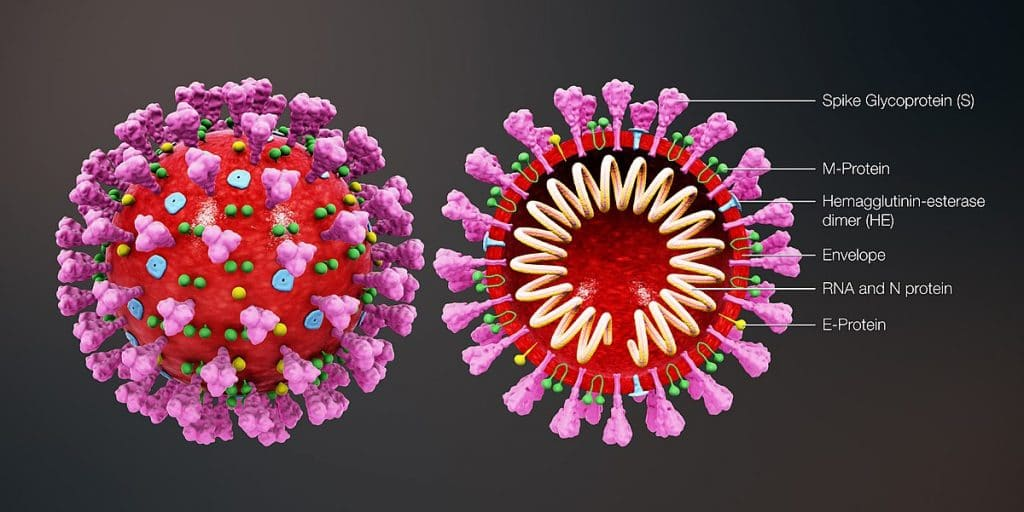

In [2]:
Image("cv1.jpg")

In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

In [5]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [6]:
from matplotlib import style 
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [17]:
import folium
import cufflinks as cf

In [18]:
import plotly.offline as pyo
from plotly.offline import init_notebook_mode , plot , iplot

In [19]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [20]:
df = pd.read_csv("covid_19_india.csv")

In [21]:
df_new = df.drop(columns = ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Sno', 'Date', 'Time'])

In [22]:
df_new = df_new.rename(columns = {'State/UnionTerritory':'States'})

In [23]:
df_new = df_new.groupby(['States']).sum()

In [24]:
#df_new = df_new.sort_values( by = 'Confirmed' , ascending = False)

## COVID19-Color Mappings

In [25]:
df_new.style.background_gradient(cmap = 'Reds')

,Cured,Deaths,Confirmed
States,,,
Andaman and Nicobar Islands,327035.000000,5017.000000,376093.000000
Andhra Pradesh,56536152.000000,555228.000000,64911493.000000
Arunachal Pradesh,734104.000000,2086.000000,941675.000000
Assam,14137404.000000,63130.000000,16820098.000000
Bihar,16487424.000000,93293.000000,18536035.000000
Chandigarh,832863.000000,14459.000000,1009607.000000
Chhattisgarh,8308061.000000,105254.000000,10718422.000000
Dadar Nagar Haveli,14.000000,0.000000,186.000000
Dadra and Nagar Haveli and Daman and Diu,276610.000000,250.000000,308098.000000


In [26]:
plt.rcParams['figure.figsize']=17,8

In [27]:
df_new = df_new.reset_index()

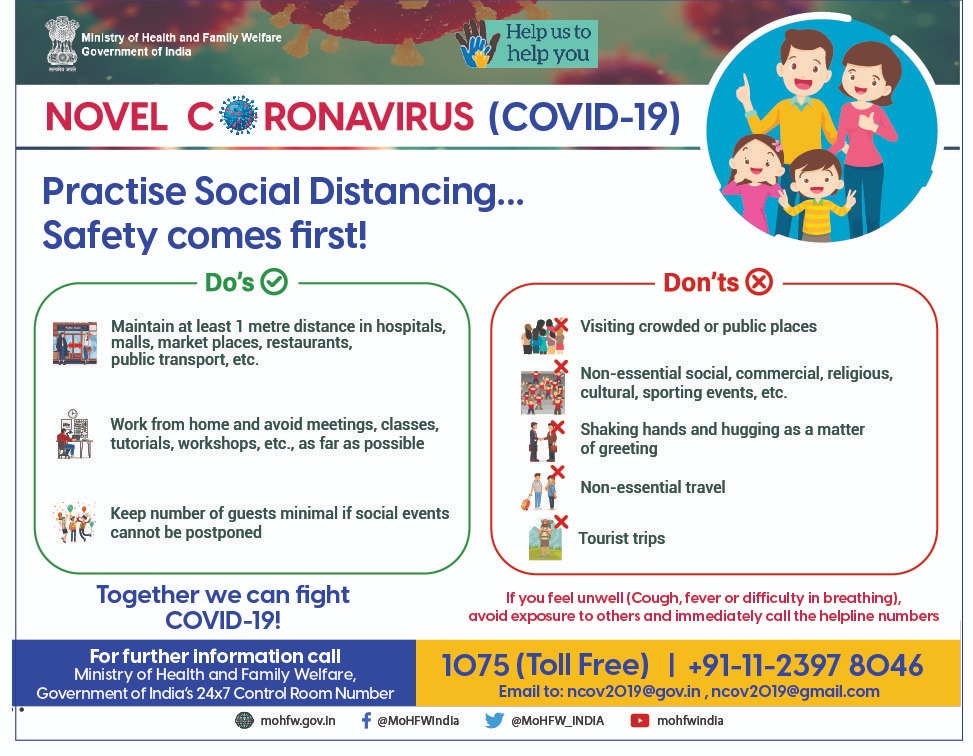

In [28]:
Image("cv2.jpg")

# India - Reports

In [29]:
df_new.iplot( kind = 'bar', x = 'States' , y = 'Confirmed' , title = "Nov25 Reports", xTitle='States', yTitle='Cases(in million)')

In [30]:
df_new.iplot( kind = 'scatter', x = 'States' , y = 'Confirmed' , title = "Nov25 Reports", xTitle='States', yTitle='Cases(in million)',colors = 'purple', mode='markers+lines')

In [31]:
df_sort = df_new.sort_values(by = 'Confirmed', ascending = False)

In [32]:
fig = go.FigureWidget( layout=go.Layout() )
def bubble_chart(n):
    fig = px.scatter(df_sort.head(n), x="States", y="Confirmed", size="Confirmed", color="States",
               hover_name="States", size_max=40,)
    fig.update_layout(
    title= str(n) +" worst hit states-Nov25",
    xaxis_title="States",
    yaxis_title="Cases",
    width = 1100
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [33]:
import pandas as pd

In [34]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [35]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [36]:
from __future__ import print_function
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

In [37]:
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [38]:
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

# Worldwide Rising Trends

In [39]:

def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['green', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure()
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
    
    fig.update_layout(
        title="Reports-COVID19-" + country,
        xaxis_title='Date',
        yaxis_title='Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightcyan",
        width = 950,
        
    )
    
    fig.update_yaxes(type="linear")
    fig.show()

#plot_cases_of_a_country('India')

interact(plot_cases_of_a_country, country='India');


interactive(children=(Text(value='India', description='country'), Output()), _dom_classes=('widget-interact',)…

# COVID-19 spread-worldwide

In [40]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d as ip
import plotly.express as px

In [42]:
hc_df = pd.read_csv("Heat_Map_Covid.csv")
hc_new = hc_df.Cases.values.tolist()

In [43]:
m = ip([1 , max(hc_new)], [5,15])

In [44]:
circle_redius = m(hc_new)

In [45]:
typelist = ['stamen-terrain', 'stamen-watercolor']

In [46]:
for i in typelist:
    print(i)
    fig = px.density_mapbox(hc_df , lat='Lat', lon='Long', radius=circle_redius, zoom=0, mapbox_style=i)
    fig.show()

stamen-terrain


stamen-watercolor


# Helpline - Statewise

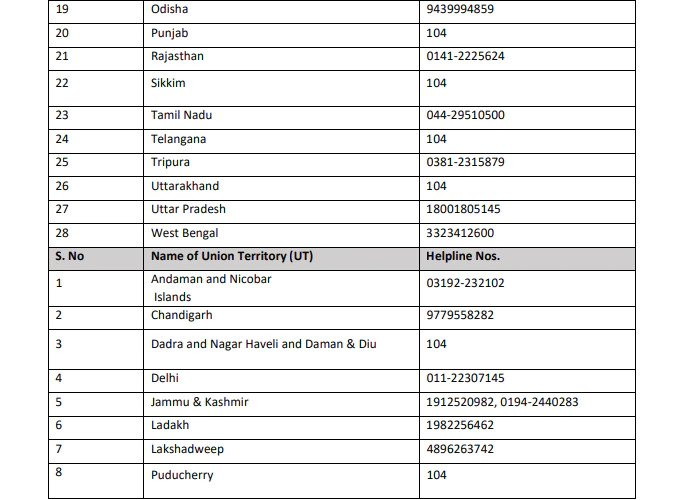

In [47]:
Image("cv3.jpg")

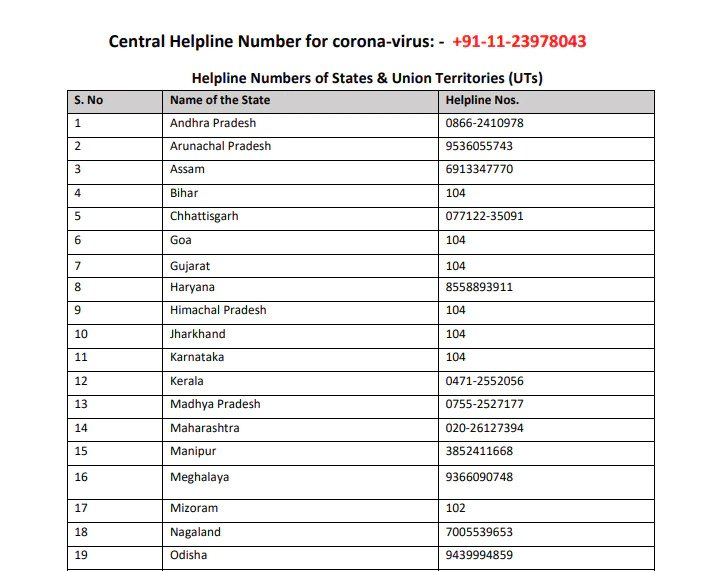

In [48]:
Image("cv4.jpg")

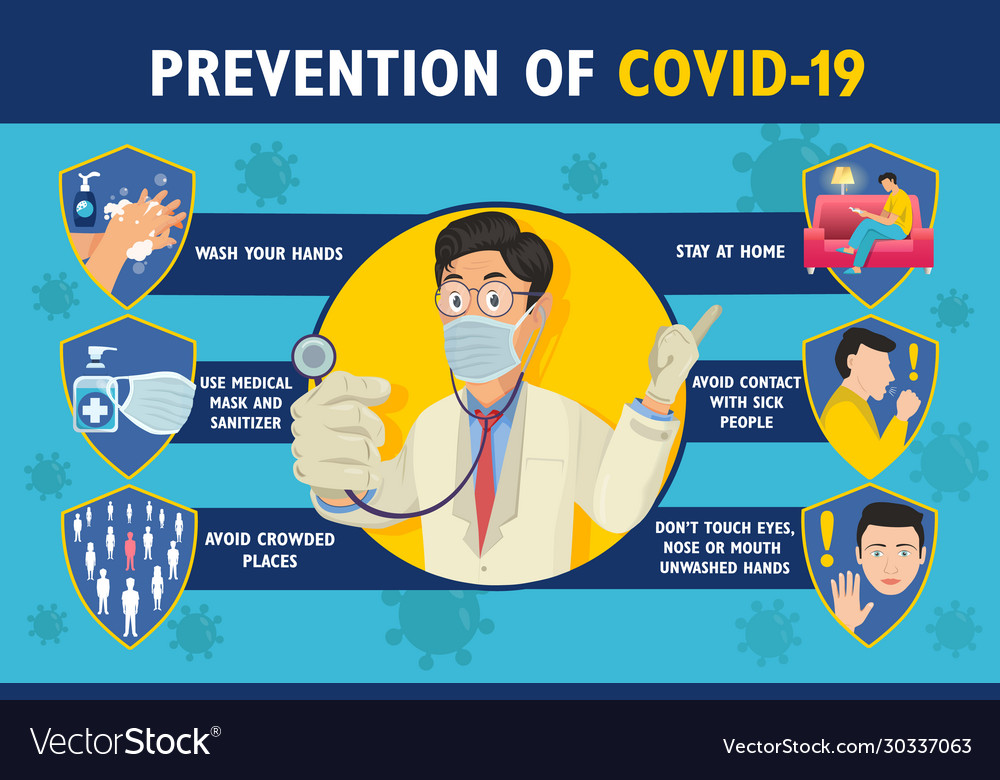

In [49]:
Image("cv5.jpg")

# Precautionary Measures

•	Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water. 

Why? Washing your hands with soap and water or using alcohol-based hand rub kills viruses that may be on your hands.

•	Maintain at least 1 metre (3 feet) distance between yourself and others. 

Why? When someone coughs, sneezes, or speaks they spray small liquid droplets from their nose or mouth which may contain virus. If you are too close, you can breathe in the droplets, including the COVID-19 virus if the person has the disease.

•	Avoid going to crowded places. 

Why? Where people come together in crowds, you are more likely to come into close contact with someone that has COIVD-19 and it is more difficult to maintain physical distance of 1 metre (3 feet).

•	Avoid touching eyes, nose and mouth. Why? Hands touch many surfaces and can pick up viruses. Once contaminated, hands can transfer the virus to your eyes, nose or mouth. From there, the virus can enter your body and infect you.

•	Stay home and self-isolate even with minor symptoms such as cough, headache, mild fever, until you recover. Have someone bring you supplies. If you need to leave your house, wear a mask to avoid infecting others. 

Why? Avoiding contact with others will protect them from possible COVID-19 and other viruses.

•	Keep up to date on the latest information from trusted sources, such as WHO or your local and national health authorities. 

Why? Local and national authorities are best placed to advise on what people in your area should be doing to protect themselves.


# Let's FIGHT

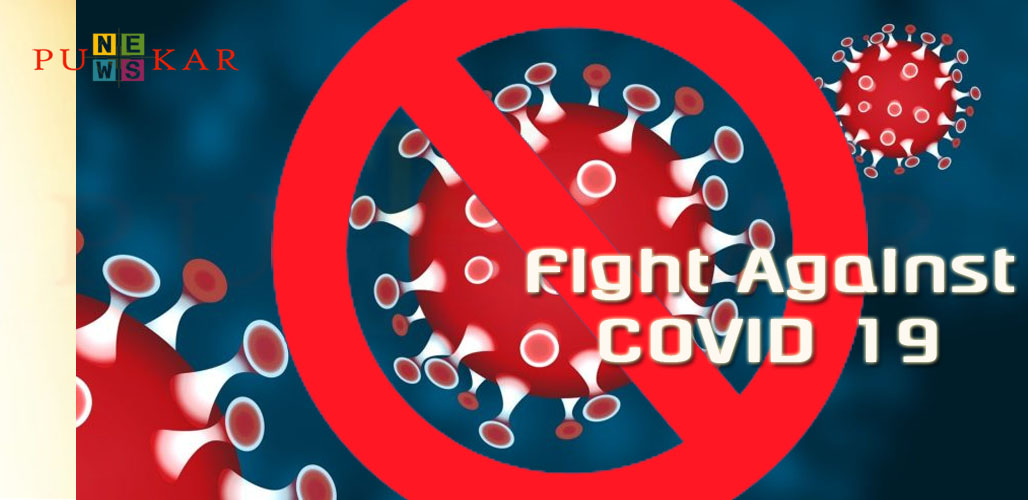

In [50]:
Image("cv6.jpg")

# Reference Links

https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public

https://www.punekarnews.in/indian-initiative-to-fight-covid-19-enhancing-natural-defense/

https://www.vectorstock.com/royalty-free-vectors/social-distancing-vectors

https://www.mohfw.gov.in/pdf/StatewiseCovidHospitalslink19062020.pdf

https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/prevention.html
